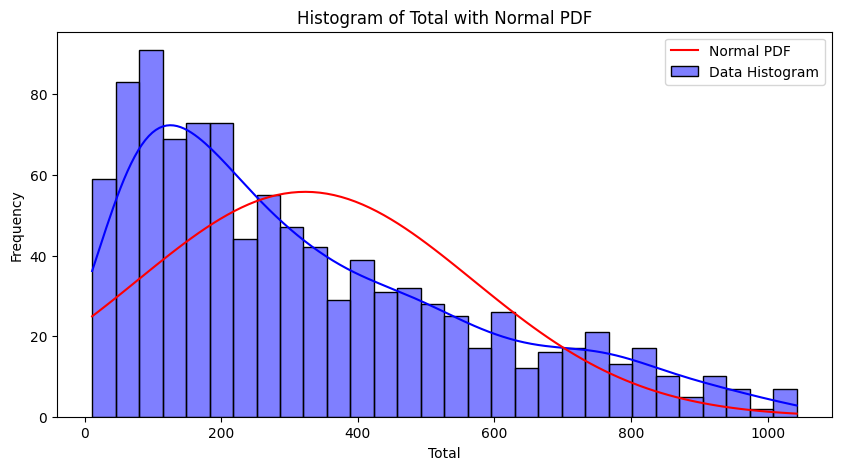

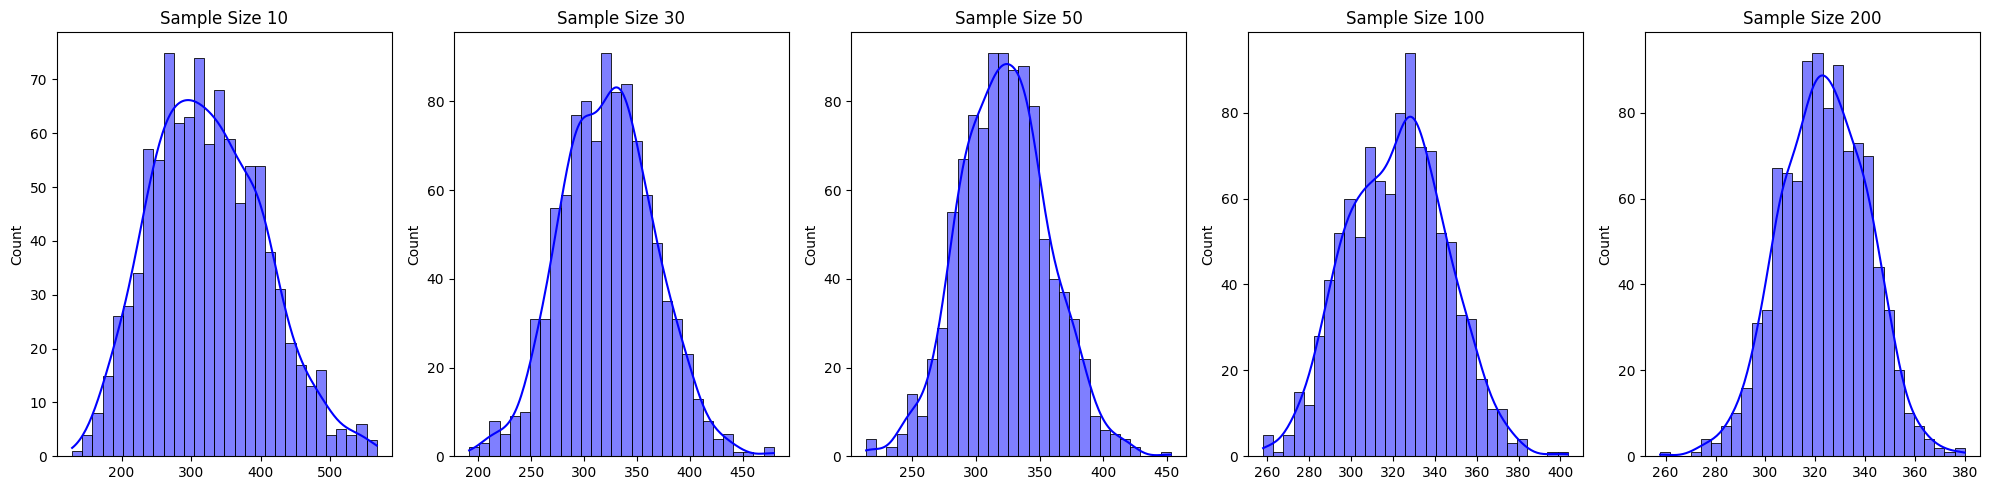

Original Data Skewness: 0.8912303920037631
Original Data Kurtosis: -0.08746991289329031
Sample Means Skewness and Kurtosis: {10: (0.3158467330536157, -0.25794913296065847), 30: (0.09404026344741082, 0.05854933414886654), 50: (0.09777069247418589, 0.10716892789654064), 100: (0.03534244767563235, -0.3066312851983759), 200: (-0.06262024569847863, 0.0018700639939672747)}
99th Percentile Value: 894.981575569966


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

# Load the dataset
file_path = "/content/supermarket_sales -.csv"
df = pd.read_csv(file_path)

# Select numerical column for analysis
data_column = 'Total'
data = df[data_column]

# Compute mean and standard deviation
data_mean = data.mean()
data_std = data.std()

# Plot histogram of original data
def plot_pdf_histogram():
    plt.figure(figsize=(10, 5))
    sns.histplot(data, kde=True, bins=30, color='blue', label='Data Histogram')
    x_values = np.linspace(min(data), max(data), 100)
    y_values = norm.pdf(x_values, data_mean, data_std) * len(data) * (max(data) - min(data)) / 30
    plt.plot(x_values, y_values, color='red', label='Normal PDF')
    plt.xlabel('Total')
    plt.ylabel('Frequency')
    plt.title('Histogram of Total with Normal PDF')
    plt.legend()
    plt.show()

plot_pdf_histogram()

# Generate sample means for different sample sizes
sample_sizes = [10, 30, 50, 100, 200]
num_samples = 1000
sample_means = {size: [np.mean(np.random.choice(data, size, replace=True)) for _ in range(num_samples)] for size in sample_sizes}

# Plot histograms of sample means
fig, axes = plt.subplots(1, len(sample_sizes), figsize=(20, 5))
for i, size in enumerate(sample_sizes):
    sns.histplot(sample_means[size], kde=True, bins=30, ax=axes[i], color='blue')
    axes[i].set_title(f'Sample Size {size}')
plt.tight_layout()
plt.show()

# Compute skewness and kurtosis of original data and sample means
original_skewness = skew(data)
original_kurtosis = kurtosis(data)
sample_stats = {size: (skew(sample_means[size]), kurtosis(sample_means[size])) for size in sample_sizes}

# Compute the 99th percentile value (qnorm equivalent)
percentile_99_value = norm.ppf(0.99, loc=data_mean, scale=data_std)

# Print computed statistics
print("Original Data Skewness:", original_skewness)
print("Original Data Kurtosis:", original_kurtosis)
print("Sample Means Skewness and Kurtosis:", sample_stats)
print("99th Percentile Value:", percentile_99_value)
